#Task 1 : Exploratory Data Analysis (EDA)


In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [138]:
!pip install tsfel


In [139]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("/content/drive/MyDrive/Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


Task 1 Q.1
Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data?

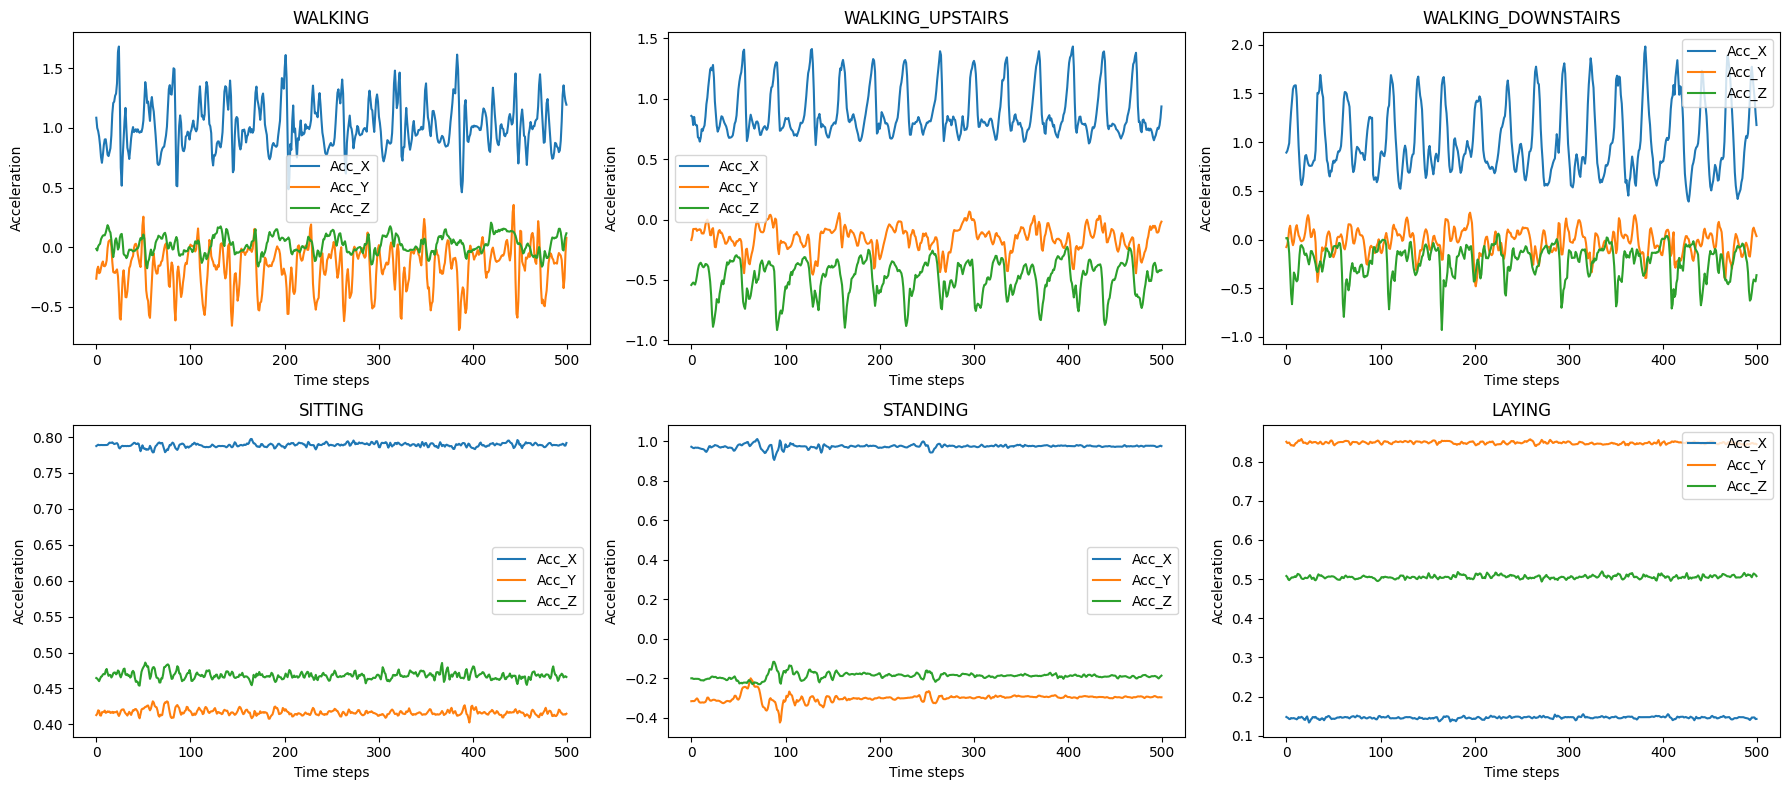

In [140]:
import matplotlib.pyplot as plt
import numpy as np

class_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
               4:"SITTING", 5:"STANDING", 6:"LAYING"}

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
axs = axs.flatten()  # flatten to iterate easily

for i, class_num in enumerate(range(1, 7)):
    # get index of first sample with this class
    idx = np.where(y_train == class_num)[0][0]
    sample = X_train[idx]  # shape (500,3)

    # Plotting all the accleration for the various activities
    axs[i].plot(sample[:,0], label='Acc_X')
    axs[i].plot(sample[:,1], label='Acc_Y')
    axs[i].plot(sample[:,2], label='Acc_Z')
    axs[i].set_title(class_names[class_num])
    axs[i].set_xlabel("Time steps")
    axs[i].set_ylabel("Acceleration")
    axs[i].legend()

plt.tight_layout()
plt.show()


From the plots of different activities, it is evident that the model can easily distinguish between dynamic (movable) activities and static (non-movable) activities. However, separating activities within the same category is more challenging — for example, sitting, standing, and laying show strong similarities with each other, while walking, walking upstairs, and walking downstairs also share overlapping patterns. This suggests that while the model is effective in broadly differentiating static vs dynamic activities, distinguishing between closely related activities may require more advanced features or classifiers.

Task 1 Q.2
Do you think we need a machine learning model to differentiate    between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration
(a(x)^2+a(y)^2+a(z)^2)^1/2
 for each activity and justify your answer.

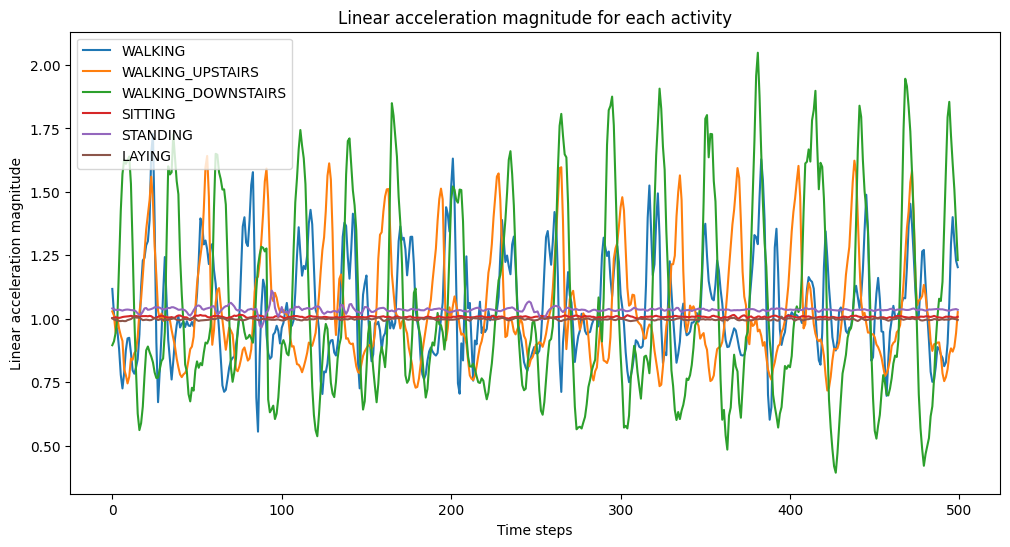

In [141]:
import matplotlib.pyplot as plt
import numpy as np

class_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
               4:"SITTING", 5:"STANDING", 6:"LAYING"}

plt.figure(figsize=(12,6))

for class_num in range(1,7):
    idx = np.where(y_train == class_num)[0][0]
    sample = X_train[idx]
    # Compute linear acceleration magnitude
    acc_mag = np.sqrt(np.sum(sample**2, axis=1))
    plt.plot(acc_mag, label=class_names[class_num])

plt.xlabel("Time steps")
plt.ylabel("Linear acceleration magnitude")
plt.title("Linear acceleration magnitude for each activity")
plt.legend()
plt.show()


The linear acceleration plots clearly justify the distinction between activities. Walking downstairs shows the highest acceleration spikes due to faster downward motion, walking upstairs exhibits lower spikes since upward movement is slower, and normal walking lies in between. In contrast, static activities such as sitting, standing, and laying display acceleration values close to zero, reflecting minimal movement.

Task 1 Q.3
Visualize the data using PCA. [1 marks]
Use PCA (Principal Component Analysis) on Total Acceleration
(a(x)^2+a(y)^2+a(z)^2)^1/2
 to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.
Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.
Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

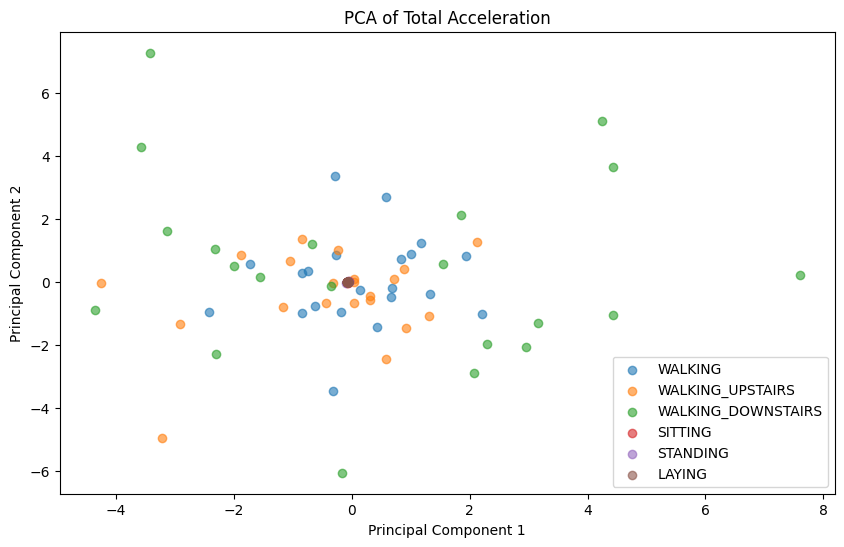

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Compute total acceleration magnitude for all training samples
X_mag = np.sqrt(np.sum(X_train**2, axis=2))  # shape: (num_samples, 500)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_mag)  # shape: (num_samples, 2)

# Plot PCA scatter
class_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
               4:"SITTING", 5:"STANDING", 6:"LAYING"}

plt.figure(figsize=(10,6))
for class_num in range(1,7):
    idx = np.where(y_train == class_num)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=class_names[class_num], alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Total Acceleration")
plt.legend()
plt.show()


Principle component 1:
this is the linear combination of the original features that explains the maximum variance in the dataset. It's like a new axis where data is most spread out.In activity recognition, PC1 often captures the separation between static vs dynamic activities, since that’s the largest difference in the data.

Principle component 2:
This is the another linear combination of features, chosen orthogonal to principle component 1. It explains the second-highest variance in the dataset. PC2 often separates similar activities within the same category, e.g. sitting vs standing, or walking upstairs vs downstairs.

In [143]:
import tsfel
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Compute total acceleration magnitude
X_mag = np.sqrt(np.sum(X_train**2, axis=2))  # shape: (num_samples, 500)

# The TSFEL requires pandas DataFrame with columns as signals So we will create a Dataframe per sample.
feature_list = []
for sample in X_mag:
    df = pd.DataFrame(sample, columns=["acc_mag"])
    # Extract TSFEL features using default feature configuration
    features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, verbose=0)
    feature_list.append(features.values.flatten())

X_tsfel = np.array(feature_list)
print("TSFEL feature shape:", X_tsfel.shape)


/tmp/ipython-input-921279866.py:15: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, verbose=0)
/tmp/ipython-input-921279866.py:15: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, verbose=0)
/tmp/ipython-input-921279866.py:15: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, verbose=0)
/tmp/ipython-input-921279866.py:15: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, verbose=0)
/tmp/ipython-input-921279866.py:15: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(tsfel.get_feature

TSFEL feature shape: (126, 156)


/tmp/ipython-input-921279866.py:15: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, verbose=0)
/tmp/ipython-input-921279866.py:15: UserWarning: Using default sampling frequency set in configuration file.
  features = tsfel.time_series_features_extractor(tsfel.get_features_by_domain(), df, verbose=0)


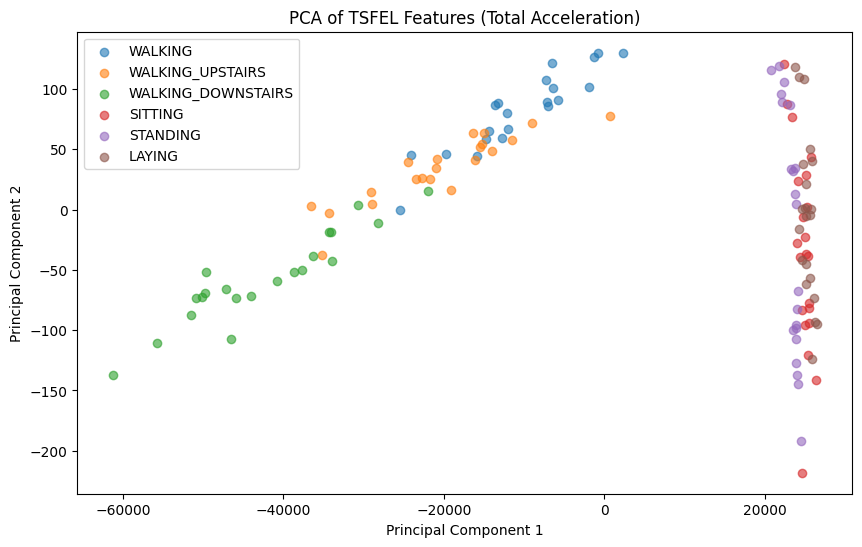

In [144]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce features to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tsfel)  # shape: (num_samples, 2)

# Map class numbers to activity names
class_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
               4:"SITTING", 5:"STANDING", 6:"LAYING"}

# Plot PCA scatter plot
plt.figure(figsize=(10,6))
for class_num in range(1,7):
    idx = np.where(y_train == class_num)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=class_names[class_num], alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of TSFEL Features (Total Acceleration)")
plt.legend()
plt.show()


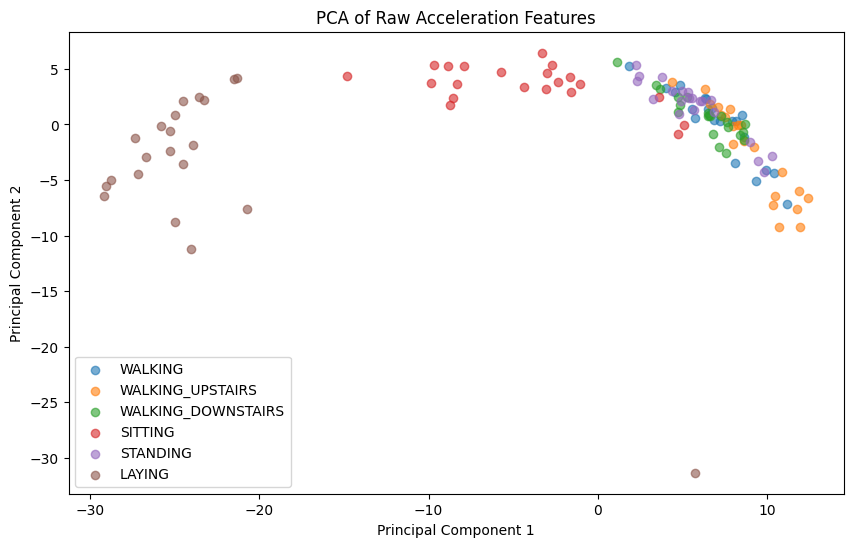

In [145]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Flatten each sample
X_flat = X_train.reshape(X_train.shape[0], -1)  # shape: (num_samples, 1500)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_flat)  # shape: (num_samples, 2)
# Map class numbers to activity names
class_names = {1:"WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS",
               4:"SITTING", 5:"STANDING", 6:"LAYING"}

plt.figure(figsize=(10,6))
for class_num in range(1,7):
    idx = np.where(y_train == class_num)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=class_names[class_num], alpha=0.6)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Raw Acceleration Features")
plt.legend()
plt.show()


Among the PCA results on total acceleration, TSFEL features, and dataset features, the clearest visualization is obtained using TSFEL. It provides better separation not only between static and dynamic activities but also among their subclasses. Since TSFEL incorporates informative features such as mean, variance, energy, and entropy, applying PCA on these features results in a richer and more meaningful separation.

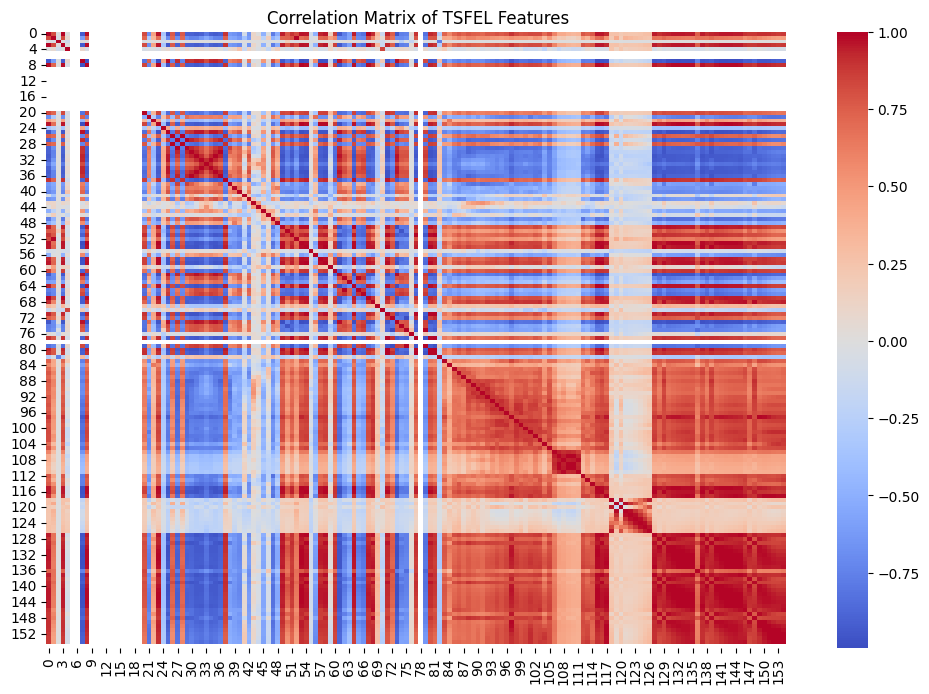

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert TSFEL features to DataFrame
df_tsfel = pd.DataFrame(X_tsfel)

# Compute correlation matrix
corr_tsfel = df_tsfel.corr()
# Plotting
plt.figure(figsize=(12,8))
sns.heatmap(corr_tsfel, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of TSFEL Features")
plt.show()


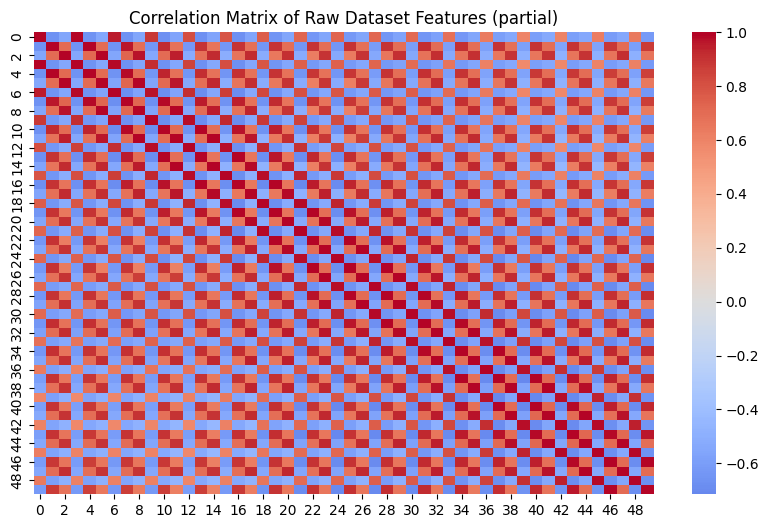

In [147]:
X_flat = X_train.reshape(X_train.shape[0], -1)
df_raw = pd.DataFrame(X_flat)

corr_raw = df_raw.corr()

# Plot only a small part (too many features otherwise!)
plt.figure(figsize=(10,6))
sns.heatmap(corr_raw.iloc[:50, :50], cmap="coolwarm", center=0)  # first 50 features for clarity
plt.title("Correlation Matrix of Raw Dataset Features (partial)")
plt.show()


Redundant TSFEL features:
Variance & Standard Deviation,
Mean & Median,
Energy & Variance

Redundant Datset Features:
acc_std & acc_var,
acc_mean (x, y, z) & acc_mag_mean

# Task 2 : Decision Trees for Human Activity Recognition

Task 2 Q.1
Use Sklearn Library to train Decision Tress. [1.5 marks]
Train a decision tree model using the raw accelerometer data. Report the accuracy, precision, recall and confusion matrix of the model.

Train a decision tree model using the features obtained by TSFEL. Report the accuracy, precision, recall and confusion matrix of the model.

Train a decision tree model using the features provided in the dataset. Report the accuracy, precision, recall and confusion matrix of the model.

Compare the results of the three models. Which model do you think is better?

In [148]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Flatten the 3D accelerometer data (samples, time, features) into 2D because DecisionTree expects (samples, features)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Train Decision Tree
dt_raw = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=4)
dt_raw.fit(X_train_flat, y_train)

# Predictions
y_pred_raw = dt_raw.predict(X_test_flat)

# Scores of the model
acc_raw = accuracy_score(y_test, y_pred_raw)
prec_raw = precision_score(y_test, y_pred_raw, average="macro")
rec_raw = recall_score(y_test, y_pred_raw, average="macro")
cm_raw = confusion_matrix(y_test, y_pred_raw)

print("\n=== Raw Accelerometer Decision Tree ===")
print("Accuracy:", acc_raw)
print("Precision:", prec_raw)
print("Recall:", rec_raw)
print("Confusion Matrix:\n", cm_raw)



=== Raw Accelerometer Decision Tree ===
Accuracy: 0.6296296296296297
Precision: 0.6315462315462316
Recall: 0.6296296296296297
Confusion Matrix:
 [[4 2 3 0 0 0]
 [3 5 0 1 0 0]
 [4 3 2 0 0 0]
 [0 0 0 5 4 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


Decision Tree accuracy for different depths (2 to 8):
Depth 2: Accuracy = 0.5185
Depth 3: Accuracy = 0.5926
Depth 4: Accuracy = 0.6296
Depth 5: Accuracy = 0.5926
Depth 6: Accuracy = 0.5556
Depth 7: Accuracy = 0.5556
Depth 8: Accuracy = 0.5556


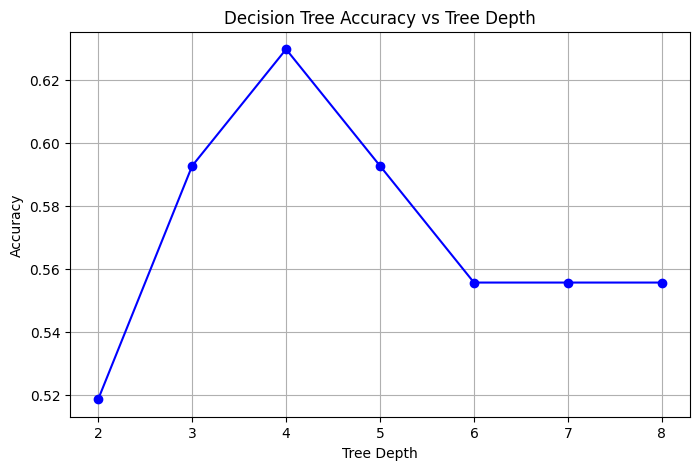

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# # Load author-provided features
# X_train = pd.read_csv("/content/drive/MyDrive/train/X_train.txt", delim_whitespace=True, header=None)
# y_train = pd.read_csv("/content/drive/MyDrive/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()

# X_test = pd.read_csv("/content/drive/MyDrive/test/X_test.txt", delim_whitespace=True, header=None)
# y_test = pd.read_csv("/content/drive/MyDrive/test/y_test.txt", delim_whitespace=True, header=None).values.ravel()

# Flatten 3D accelerometer data (samples, time, features) into 2D (samples, features)
# X_train_flat = X_train.values.reshape(X_train.shape[0], -1)
# X_test_flat = X_test.values.reshape(X_test.shape[0], -1)


depths = range(2, 9)  # Depths from 2 to 8
accuracies = []

print("Decision Tree accuracy for different depths (2 to 8):")
for depth in depths:
    dt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=depth)
    dt.fit(X_train_flat, y_train)
    y_pred = dt.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Depth {depth}: Accuracy = {acc:.4f}")

# Plotting accuracy vs depth
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', color='blue', linestyle='-')
plt.title('Decision Tree Accuracy vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()


In [150]:
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load TSFEL feature configuration (time, frequency, statistical, etc.)
cfg = tsfel.get_features_by_domain()

def extract_features(X):

    feature_list = []
    for sample in X:
        # sample shape: (time, features) where features = acc_x, acc_y, acc_z
        df = pd.DataFrame(sample, columns=['acc_x','acc_y','acc_z'])
        feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
        feature_list.append(feats.values.flatten())
    return np.array(feature_list)

# Extract features for training & testing sets
X_train_feats = extract_features(X_train)
X_test_feats = extract_features(X_test)

print("Feature matrix shape (train):", X_train_feats.shape)
print("Feature matrix shape (test):", X_test_feats.shape)

# Train Decision Tree on TSFEL features
dt_tsfel = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=3)
dt_tsfel.fit(X_train_feats, y_train)

# Predictions
y_pred_tsfel = dt_tsfel.predict(X_test_feats)

# Evaluation
acc_tsfel = accuracy_score(y_test, y_pred_tsfel)
prec_tsfel = precision_score(y_test, y_pred_tsfel, average="macro")
rec_tsfel = recall_score(y_test, y_pred_tsfel, average="macro")
cm_tsfel = confusion_matrix(y_test, y_pred_tsfel)

# Results
print("\n=== TSFEL Feature-based Decision Tree ===")
print("Accuracy:", acc_tsfel)
print("Precision:", prec_tsfel)
print("Recall:", rec_tsfel)
print("Confusion Matrix:\n", cm_tsfel)


/tmp/ipython-input-414462202.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-414462202.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-414462202.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-414462202.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-414462202.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = tsfel.time_series_features_extractor(cfg, df, verbose=0)
/tmp/ipython-input-414462202.py:14: UserWarning: Using default sampling frequency set in configuration file.
  feats = t

Feature matrix shape (train): (126, 468)
Feature matrix shape (test): (54, 468)

=== TSFEL Feature-based Decision Tree ===
Accuracy: 0.8148148148148148
Precision: 0.8555555555555555
Recall: 0.8148148148148149
Confusion Matrix:
 [[8 0 1 0 0 0]
 [0 5 4 0 0 0]
 [2 0 7 0 0 0]
 [0 0 0 6 3 0]
 [0 0 0 0 9 0]
 [0 0 0 0 0 9]]


In [151]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Load author-provided features
X_train = pd.read_csv("/content/drive/MyDrive/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("/content/drive/MyDrive/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()

X_test = pd.read_csv("/content/drive/MyDrive/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("/content/drive/MyDrive/test/y_test.txt", delim_whitespace=True, header=None).values.ravel()

# Train Decision Tree
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average="weighted")
rec = recall_score(y_test, y_pred, average="weighted")
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("Confusion Matrix:\n", cm)

/tmp/ipython-input-1485162489.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("/content/drive/MyDrive/train/X_train.txt", delim_whitespace=True, header=None)
/tmp/ipython-input-1485162489.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("/content/drive/MyDrive/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()
/tmp/ipython-input-1485162489.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("/content/drive/MyDrive/test/X_test.txt", delim_whitespace=True, header=None)
/tmp/ipython-input-1485162489.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a futur

Accuracy: 0.838140481845945
Precision: 0.8464080320742233
Recall: 0.838140481845945
Confusion Matrix:
 [[470  16  10   0   0   0]
 [ 86 379   6   0   0   0]
 [ 49 105 266   0   0   0]
 [  0   0   0 399  92   0]
 [  0   0   0 113 419   0]
 [  0   0   0   0   0 537]]


The best discription with the featured dataset which gives the most accuracy pricision, and recall at its maximum depth =5

/tmp/ipython-input-1769567611.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("/content/drive/MyDrive/train/X_train.txt", delim_whitespace=True, header=None)
/tmp/ipython-input-1769567611.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("/content/drive/MyDrive/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()
/tmp/ipython-input-1769567611.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("/content/drive/MyDrive/test/X_test.txt", delim_whitespace=True, header=None)
/tmp/ipython-input-1769567611.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a futu

Decision Tree accuracy for different depths (2 to 8):
Depth 2: Accuracy = 0.6247
Depth 3: Accuracy = 0.8151
Depth 4: Accuracy = 0.8398
Depth 5: Accuracy = 0.8544
Depth 6: Accuracy = 0.8459
Depth 7: Accuracy = 0.8409
Depth 8: Accuracy = 0.8402


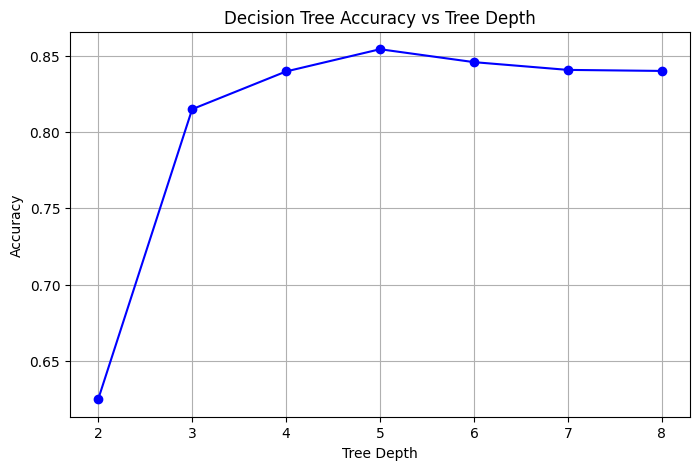

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load author-provided features
X_train = pd.read_csv("/content/drive/MyDrive/train/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv("/content/drive/MyDrive/train/y_train.txt", delim_whitespace=True, header=None).values.ravel()

X_test = pd.read_csv("/content/drive/MyDrive/test/X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv("/content/drive/MyDrive/test/y_test.txt", delim_whitespace=True, header=None).values.ravel()

# Flatten 3D accelerometer data (samples, time, features) into 2D (samples, features)
X_train_flat = X_train.values.reshape(X_train.shape[0], -1)
X_test_flat = X_test.values.reshape(X_test.shape[0], -1)


depths = range(2, 9)  # Depths from 2 to 8
accuracies = []

print("Decision Tree accuracy for different depths (2 to 8):")
for depth in depths:
    dt = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=depth)
    dt.fit(X_train_flat, y_train)
    y_pred = dt.predict(X_test_flat)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"Depth {depth}: Accuracy = {acc:.4f}")

# Plotting accuracy vs depth
plt.figure(figsize=(8, 5))
plt.plot(depths, accuracies, marker='o', color='blue', linestyle='-')
plt.title('Decision Tree Accuracy vs Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.grid(True)
plt.show()


#